<a href="https://colab.research.google.com/github/stargazer0/MachineLearning/blob/main/4%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(fish_input[:5])
fish_target = fish['Species'].to_numpy()


['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [25]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=2)

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score,(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

<bound method ClassifierMixin.score of KNeighborsClassifier(n_neighbors=3)> (array([[-1.02496425e+00, -1.49667402e+00, -1.49074008e+00,
        -1.55602098e+00, -1.74077250e+00],
       [-7.19754934e-01, -7.80013062e-01, -7.48988165e-01,
        -9.04206072e-02, -8.01941460e-01],
       [-4.51017175e-01, -8.19666790e-02, -1.77753935e-01,
        -3.70150570e-01, -9.71138713e-02],
       [-8.34928260e-01, -8.07934918e-01, -9.10979962e-01,
        -8.20021792e-01, -6.83904830e-01],
       [-1.02167358e+00, -1.45013759e+00, -1.44811066e+00,
        -1.50216348e+00, -1.80936368e+00],
       [ 1.06268939e+00,  1.91909962e+00,  1.80025116e+00,
        -2.53158460e-01,  6.11220894e-01],
       [ 8.43311624e-01,  8.95298258e-01,  7.85670960e-01,
         4.07595610e-01,  1.18076344e+00],
       [ 3.22289438e-01,  3.36861151e-01,  5.21368555e-01,
         1.27582788e+00,  2.88445620e-01],
       [-3.02937185e-01, -3.54302534e-02,  4.39190497e-02,
        -5.02502695e-02,  2.64872791e-01],
     

In [23]:
print(kn.classes_)
print(kn.predict(test_scaled[:5]))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica']


In [22]:
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.8 0.2]
 [1.  0.  0. ]
 [0.  0.  1. ]]


In [21]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Parkki' 'Bream' 'Whitefish' 'Perch' 'Perch']]


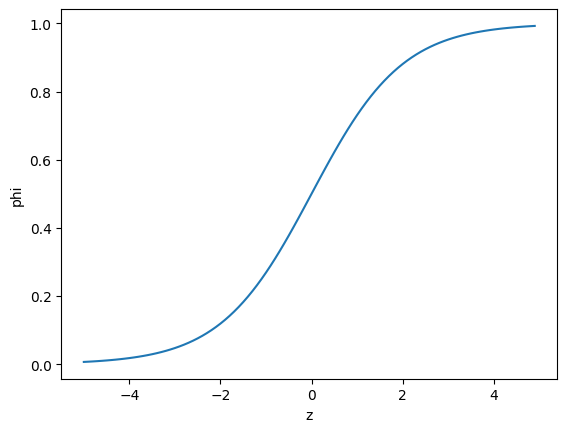

In [19]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [10]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))

In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.02598921 0.97401079]
 [0.02766772 0.97233228]
 [0.98265435 0.01734565]
 [0.99813377 0.00186623]
 [0.88066854 0.11933146]]


In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.43488363 -0.63524582 -0.72026555 -1.02550146 -0.76714014]] [-1.77760224]


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[ 3.62374081  3.55943129 -4.03691565 -6.28196531 -1.9987763 ]


In [ ]:
from scipy.special import expit
print(expit(decisions))

[0.97401079 0.97233228 0.01734565 0.00186623 0.11933146]


In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.907563025210084
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Bream' 'Bream' 'Smelt' 'Bream' 'Pike']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.986 0.01  0.    0.    0.    0.    0.004]
 [0.94  0.042 0.    0.    0.003 0.    0.016]
 [0.    0.001 0.021 0.    0.001 0.976 0.   ]
 [0.965 0.014 0.    0.    0.    0.    0.02 ]
 [0.    0.    0.171 0.801 0.025 0.001 0.002]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[  9.53   4.97  -5.02  -1.18   0.27 -12.61   4.04]
 [  7.78   4.67  -4.14  -2.3    1.89 -11.58   3.68]
 [-10.84   1.94   4.81  -4.24   1.87   8.64  -2.16]
 [  9.63   5.41  -3.09  -3.35   1.74 -16.11   5.76]
 [ -4.11  -8.     4.42   5.96   2.49  -0.66  -0.09]]


In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.986 0.01  0.    0.    0.    0.    0.004]
 [0.94  0.042 0.    0.    0.003 0.    0.016]
 [0.    0.001 0.021 0.    0.001 0.976 0.   ]
 [0.965 0.014 0.    0.    0.    0.    0.02 ]
 [0.    0.    0.171 0.801 0.025 0.001 0.002]]


In [ ]:
dic = {}
for i in range(1,100):
  lr = LogisticRegression(C=i, max_iter=1000)
  lr.fit(train_scaled, train_target)
  result1 = []
  result2 = []
  seq = []
  fr = []
  #print(lr.score(train_scaled, train_target))
  #print(lr.score(test_scaled, test_target))
  result1.append(lr.score(train_scaled, train_target))
  dic[i] = lr.score(test_scaled, test_target)
  result2.append(lr.score(test_scaled, test_target))






print("------------------------------------------------------")
print(max(result1))
print(max(result2))
print(seq)

------------------------------------------------------
0.9747899159663865
0.975
[]


In [ ]:
#--------------------------------------------------------------------------------

In [17]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length', 'Diagonal' , 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [18]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [12]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log',max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled, test_target))

0.9732142857142857
0.8947368421052632


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [16]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))


0.9196428571428571


In [4]:
import pandas as pd
#data = pd.read_csv('https://raw.githubusercontent.com/imnote/zdata/master/R/iris.csv')
data = pd.read_csv('Iris2.csv')
data.head()
#print(data)
print(pd.unique(data['Species']))
iris_input = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy()
print(iris_input[:4])

iris_target = data['Species'].to_numpy()
print(iris_target)


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolo

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(iris_input, iris_target, stratify=iris_target, random_state=150)
print(train_input.shape, test_input.shape)

(112, 4) (38, 4)


In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)



In [7]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9642857142857143
0.9473684210526315


In [8]:
print(kn.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [9]:
print(kn.predict(test_scaled[:5]))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica']
